In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

# Loading and Preprocessing

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['target'] = data.target

In [9]:
df[['target']].head()

,target
0,0
1,0
2,0
3,0
4,0


here 0 is for harmless and 1 is harmfull

In [10]:
df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

<Axes: >

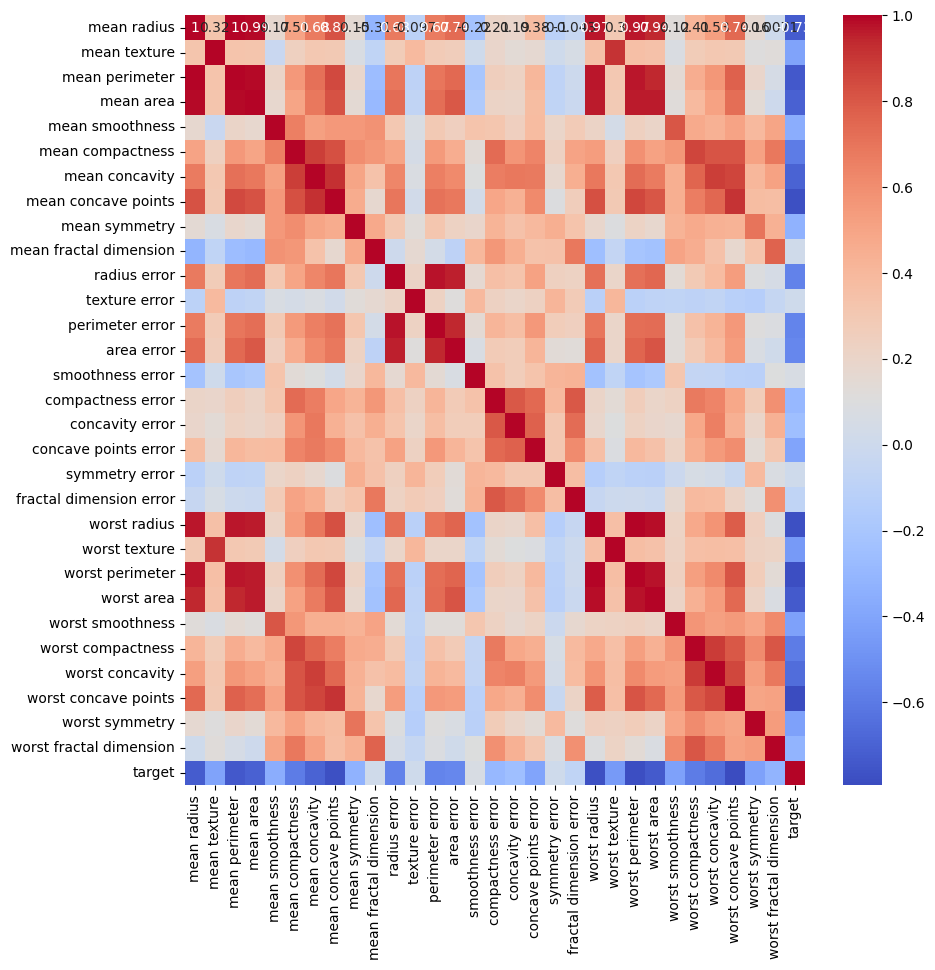

In [11]:
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')


In [12]:
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled.mean()
X_train_scaled.std()

1.0

# preprocessing steps That i have done for this data set


## a) Loading the Dataset

We used the built-in Breast Cancer dataset from the sklearn.datasets module. The dataset contains 30 numeric features computed from images of breast cancer tumors and a binary target (1:Harmfull or 0:Harmless)

## b) Exploring the Dataset

1) Data Exploration helps us understand the characteristics of the dataset (e.g., size, type of features, missing data, distribution of classes, etc.).

2) Missing Value Check: It’s crucial to ensure no missing values exist, as most models can’t handle them. Fortunately, the Breast Cancer dataset didn’t contain any missing values.

## c) Creating the Target Column for Classification

1) Purpose: The target column represents the labels or outcomes you're trying to predict or analyze in the dataset.

## d) Splitting the Dataset (Train-Test Split)

1) We split the dataset into 70% training and 30% testing sets using train_test_split from sklearn. We assigned the 30 feature columns to X and the target column to y.

Train-Test Split is crucial to evaluate a model’s performance on unseen data. Training a model on the training set and testing it on the test set helps prevent overfitting, ensuring the model generalizes well to new data.

## e) Feature Scaling

We performed Standardization (Z-score normalization) using StandardScaler on the feature columns. This transforms the features to have a mean of 0 and a standard deviation of 1.

### Why Feature Scaling?

Algorithms That Rely on Distance Metrics: Many machine learning algorithms (e.g., Logistic Regression, SVM, Neural Networks, KNN) are sensitive to the scale of features. Features with larger magnitudes could dominate those with smaller magnitudes, leading to biased results.

## f) Verifying the Scaling

After applying scaling, we verified that the mean of each feature was approximately 0 and the standard deviation was 1.

# Classification Algorithm Implementation

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## Create Model

In [16]:
logistic = LogisticRegression()
decision = DecisionTreeClassifier()
random = RandomForestClassifier()
support = SVC()
knearst = RandomForestClassifier()

1) logistic = LogisticRegression(): Initializes a logistic regression model for binary classification.
2) decision = DecisionTreeClassifier(): Initializes a decision tree classifier to make predictions based on feature splits.
3) random = RandomForestClassifier(): Initializes a random forest classifier that uses an ensemble of decision trees for improved accuracy.
4) support = SVC(): Initializes a support vector classifier for complex classification problems.
5) knearst = KNeighborsClassifier(): Initializes a k-nearest neighbors classifier that predicts class based on the closest training examples.

## Model Training and Prediction with Scaled Features

In [37]:
def pred(model):
         model.fit(X_train_scaled,y_train)
         pre = model.predict(X_test_scaled)
         print(classification_report(y_test,pre))

The pred function takes a machine learning model as input, trains it on the scaled training dataset (X_train_scaled and y_train_scaled), and evaluates its performance on the test dataset. After training, the model predicts the labels for X_test. The function then prints a classification report that provides detailed metrics (precision, recall, F1-score, and support) for each class based on the actual labels (y_test) and the predicted values (pre).

### Logistic Regression

In [38]:
pred(logistic)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Precision:
Precision indicates the proportion of true positive predictions out of all positive predictions. A precision of 0.97 for class 0 means that 97% of the instances predicted as class 0 were actually class 0, while 99% of the instances predicted as class 1 were correctly identified.

### Recall:
Recall (or Sensitivity) measures the proportion of actual positives that were correctly identified. A recall of 0.98 for both classes indicates that 98% of the actual instances for each class were successfully predicted.


_____________________________________________________________________________________________

 ### Decision Tree Classifier

In [39]:
pred(decision)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        63
           1       0.96      0.92      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



### Precision:
Precision indicates the proportion of true positive predictions out of all positive predictions. A precision of 0.87 for class 0 means that 87% of the instances predicted as class 0 were actually class 0, while 96% of the instances predicted as class 1 were correctly identified.

### Recall:
Recall (or Sensitivity) measures the proportion of actual positives that were correctly identified. A recall of 0.94 for class 0 means that the model correctly predicted 94% of the actual class 0 instances, while for class 1, a recall of 0.92 means that 92% of the actual class 1 instances were successfully predicted.

_____________________________________________________________________________________________

###  Random Forest Classifier

In [40]:
pred(random)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Precision:
Precision indicates the proportion of true positive predictions out of all positive predictions. A precision of 0.97 for class 0 means that 97% of the instances predicted as class 0 were actually class 0, while for class 1, a precision of 0.96 indicates that 96% of the instances predicted as class 1 were correctly identified.

## Recall:
Recall (or Sensitivity) measures the proportion of actual positives that were correctly identified. A recall of 0.94 for class 0 means that the model correctly predicted 94% of the actual class 0 instances, whereas for class 1, a recall of 0.98 means that 98% of the actual class 1 instances were successfully predicted.

_____________________________________________________________________________________________

### Support Vector Machine (SVM)

In [41]:
pred(support)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Precision:
Precision indicates the proportion of true positive predictions out of all positive predictions. A precision of 0.97 for class 0 means that 97% of the instances predicted as class 0 were actually class 0. For class 1, a precision of 0.98 indicates that 98% of the instances predicted as class 1 were correctly identified.

### Recall:
Recall (or Sensitivity) measures the proportion of actual positives that were correctly identified. A recall of 0.97 for class 0 indicates that the model correctly predicted 97% of the actual class 0 instances. For class 1, a recall of 0.98 means that the model successfully predicted 98% of the actual class 1 instances.

_____________________________________________________________________________________________

### k-Nearest Neighbors (k-NN)

In [42]:
pred(knearst)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Precision:
Precision indicates the proportion of true positive predictions out of all positive predictions. A precision of 0.98 for class 0 means that 98% of the instances predicted as class 0 were actually class 0. For class 1, a precision of 0.97 indicates that 97% of the instances predicted as class 1 were correctly identified.

### Recall:
Recall (or Sensitivity) measures the proportion of actual positives that were correctly identified. A recall of 0.95 for class 0 indicates that the model correctly predicted 95% of the actual class 0 instances. For class 1, a recall of 0.99 means that the model successfully predicted 99% of the actual class 1 instances.

_____________________________________________________________________________________________

# Model Comparison 

In [43]:
models=[logistic ,
decision,
random,
support,
knearst]

# Best Model:

In [57]:
def best(models):
    best_model = None
    best_f1 = 0

    for model1 in models:
        model1.fit(X_train_scaled, y_train)
        pre1 = model.predict(X_test_scaled)
        f1 = f1_score(y_test,pre1,average="weighted")
    
        if f1>best_f1:
            best_f1 = f1
            best_model = model1
        
    print("\nbest model")
    print(f"Model: {best_model} with f1_score: {best_f1}")
    
best(models)


best model
Model: LogisticRegression() with f1_score: 0.9766081871345029


The best model was selected based on its F1 score, which balances precision and recall, making it a reliable metric for evaluating the model's performance, especially in scenarios with class imbalance.

### Why the LogisticRegressionl is Suitable:

F1 Score: The model achieved the highest F1 score compared to others. The F1 score is a crucial metric that combines both precision and recall. A high F1 score means that the model not only identifies many of the positive instances correctly (high recall) but also minimizes false positives (high precision). This is particularly important in cases where false positives or false negatives can lead to significant consequences.

# Worst Model:

In [58]:
def worst(models):
    worst_model = None
    worst_f1 = float('inf') 

    for model1 in models:
        model1.fit(X_train_scaled, y_train)  
        
        pre1 = model1.predict(X_test_scaled)  
        
        f1 = f1_score(y_test, pre1, average='weighted')  
        
        if f1 < worst_f1:
            worst_f1 = f1
            worst_model = model1  
            
    print("\nWorst Model:")
    print(f"Model: {worst_model} with F1_Score: {worst_f1}")

worst(models)



Worst Model:
Model: DecisionTreeClassifier() with F1_Score: 0.918615842945535


The worst model was identified due to its consistently low F1 score, indicating a poor balance between precision and recall. This suggests that the model struggles to accurately predict both classes, resulting in high rates of false positives and false negatives. Such performance issues make the model unreliable, particularly in situations with class imbalance, where it fails to capture the minority class effectively.